In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/Plane Price.csv",index_col="Model Name",parse_dates=True)
df.index.freq="MS"
df.head()

<ipython-input-2-a0b2565fd868>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df=pd.read_csv("/content/Plane Price.csv",index_col="Model Name",parse_dates=True)


,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
Model Name,,,,,,,,,,,,,,,
100 Darter (S.L. Industries),Piston,145,104,91.0,46.0,36,450,900.0,1300.0,"2,050","1,180",25/3,37/5,370,1300000.0
7 CCM Champ,Piston,85,89,83.0,44.0,15,600,720.0,800.0,"1,350",820,20/7,36/1,190,1230000.0
100 Darter (S.L. Industries),Piston,90,90,78.0,37.0,19,650,475.0,850.0,"1,300",810,21/5,35/0,210,1600000.0
7 AC Champ,Piston,85,88,78.0,37.0,19,620,500.0,850.0,"1,300",800,21/5,35/0,210,1300000.0
100 Darter (S.L. Industries),Piston,65,83,74.0,33.0,14,370,632.0,885.0,"1,220",740,21/5,35/0,175,1250000.0


<Axes: xlabel='Model Name'>

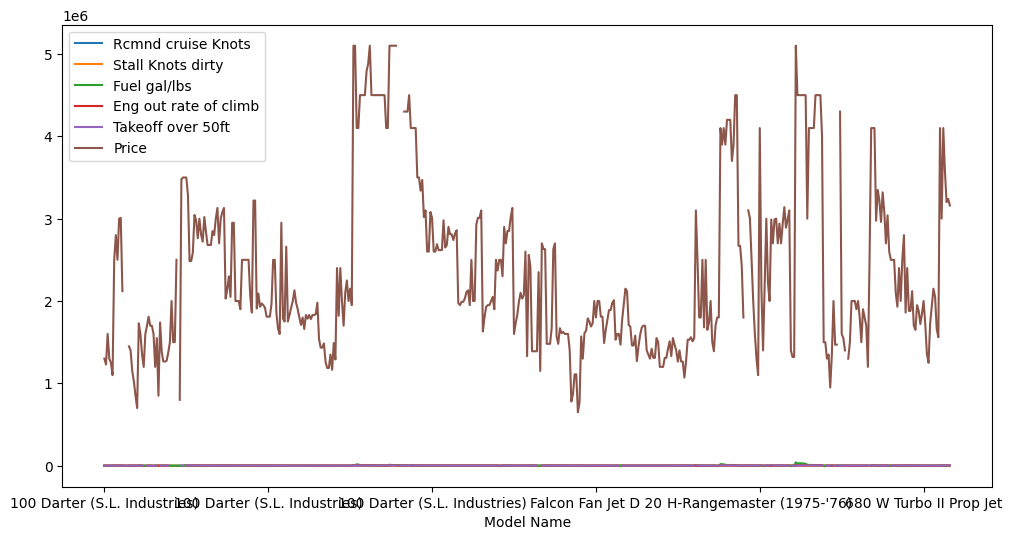

In [ ]:
df.plot(figsize=(12,6))

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
df.columns

Index(['Engine Type', 'HP or lbs thr ea engine', 'Max speed Knots',
       'Rcmnd cruise Knots', 'Stall Knots dirty', 'Fuel gal/lbs',
       'All eng rate of climb', 'Eng out rate of climb', 'Takeoff over 50ft',
       'Landing over 50ft', 'Empty weight lbs', 'Length ft/in',
       'Wing span ft/in', 'Range N.M.', 'Price'],
      dtype='object')

In [ ]:
df.isnull().sum()

Engine Type                 0
HP or lbs thr ea engine     0
Max speed Knots            20
Rcmnd cruise Knots         10
Stall Knots dirty          15
Fuel gal/lbs                0
All eng rate of climb       4
Eng out rate of climb      26
Takeoff over 50ft          25
Landing over 50ft           0
Empty weight lbs            1
Length ft/in                0
Wing span ft/in             0
Range N.M.                 18
Price                       0
dtype: int64

In [ ]:
!pip install pandas
!pip install statsmodels

In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 517 entries, 100 Darter (S.L. Industries) to 2150A Kachina
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Engine Type              517 non-null    object 
 1   HP or lbs thr ea engine  517 non-null    object 
 2   Max speed Knots          497 non-null    object 
 3   Rcmnd cruise Knots       507 non-null    float64
 4   Stall Knots dirty        502 non-null    float64
 5   Fuel gal/lbs             517 non-null    int64  
 6   All eng rate of climb    513 non-null    object 
 7   Eng out rate of climb    491 non-null    float64
 8   Takeoff over 50ft        492 non-null    float64
 9   Landing over 50ft        517 non-null    object 
 10  Empty weight lbs         516 non-null    object 
 11  Length ft/in             517 non-null    object 
 12  Wing span ft/in          517 non-null    object 
 13  Range N.M.               499 non-null    object 

In [ ]:
df['Range N.M.'] = pd.to_numeric(df['Range N.M.'].str.replace(',', ''), errors='coerce')

In [ ]:
missing_values = df['Range N.M.'].isnull().sum()
print(f"Number of missing values: {missing_values}")

Number of missing values: 18


In [ ]:
!pip install numpy
import numpy as np

df['Range N.M.'] = df['Range N.M.'].fillna(np.nanmedian(df['Range N.M.']))

In [ ]:
len(df)

517

In [ ]:
train=df.iloc[:156]
test=df.iloc[156:]
train
test

,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
Model Name,,,,,,,,,,,,,,,
T 310 P turbocharged,Jet,"3,500",491,460.0,99.0,7400,"4,340",4972.0,3075.0,"18,300","9,838",48/8,39/6,2289.0,4500000.0
310 Q,Jet,"3,500",477,441.0,105.0,7431,"5,100",4080.0,3105.0,"17,000","8,802",48/7,39/5,2289.0,4500000.0
100 Darter (S.L. Industries),Jet,"3,500",471,460.0,99.0,6198,"4,760",4972.0,3075.0,"18,300","9,838",48/8,39/6,1818.0,4500000.0
100 Darter (S.L. Industries),Jet,"3,500",477,441.0,105.0,6171,"5,100",4080.0,3105.0,"17,000","8,762",48/7,39/5,1818.0,4500000.0
100 Darter (S.L. Industries),Jet,"2,950",478,441.0,79.0,5373,"6,110",2880.0,2220.0,"15,000","8,157",47/7,43/9,1546.0,4790000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500 A,Propjet,1000,351,334.0,NaN,3819,"3,242",1930.0,2280.0,"12,050","7,856",43/5,47/8,1879.0,4100000.0
100 Darter (S.L. Industries),Propjet,720,312,288.0,89.0,578,"2,380",2280.0,3043.0,"11,200","6,837",43/5,47/8,1722.0,3584000.0
520,Propjet,720,290,275.0,87.0,390,"2,236",3230.0,3017.0,"11,200","6,389",43/5,47/8,1515.0,3200000.0


In [ ]:
df.head(),df.tail()

(                             Engine Type HP or lbs thr ea engine  \
 Model Name                                                         
 100 Darter (S.L. Industries)      Piston                     145   
 7 CCM Champ                       Piston                      85   
 100 Darter (S.L. Industries)      Piston                      90   
 7 AC Champ                        Piston                      85   
 100 Darter (S.L. Industries)      Piston                      65   
 
                              Max speed Knots  Rcmnd cruise Knots  \
 Model Name                                                         
 100 Darter (S.L. Industries)             104                91.0   
 7 CCM Champ                               89                83.0   
 100 Darter (S.L. Industries)              90                78.0   
 7 AC Champ                                88                78.0   
 100 Darter (S.L. Industries)              83                74.0   
 
                              

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
print(train.head())

                             Engine Type HP or lbs thr ea engine  \
Model Name                                                         
100 Darter (S.L. Industries)      Piston                     145   
7 CCM Champ                       Piston                      85   
100 Darter (S.L. Industries)      Piston                      90   
7 AC Champ                        Piston                      85   
100 Darter (S.L. Industries)      Piston                      65   

                             Max speed Knots  Rcmnd cruise Knots  \
Model Name                                                         
100 Darter (S.L. Industries)             104                91.0   
7 CCM Champ                               89                83.0   
100 Darter (S.L. Industries)              90                78.0   
7 AC Champ                                88                78.0   
100 Darter (S.L. Industries)              83                74.0   

                              Stall Knots dirt

In [ ]:
train = train.select_dtypes(include=["number"])
scaler.fit(train)

MinMaxScaler()

In [ ]:
scaler.fit(train)

MinMaxScaler()

In [ ]:
Scaled = MinMaxScaler()

In [ ]:
Scaled.fit(train)

MinMaxScaler()

In [ ]:
train_scaled = Scaled.transform(train)

In [ ]:
print(train_scaled)

[[5.64516129e-02 2.60000000e-01 1.38121547e-03 8.44936105e-02
  2.75362319e-01 7.72755040e-02]
 [3.49462366e-02 2.20000000e-01 1.20105693e-04 5.01621209e-02
  9.42028986e-02 2.22968845e-02]
 [2.15053763e-02 8.00000000e-02 3.60317079e-04 3.43314896e-03
  1.12318841e-01 2.84056200e-02]
 [2.15053763e-02 8.00000000e-02 3.60317079e-04 8.20141141e-03
  1.12318841e-01 2.84056200e-02]
 [1.07526882e-02 0.00000000e+00 6.00528465e-05 3.33778371e-02
  1.25000000e-01 1.77153329e-02]
 [5.37634409e-03 0.00000000e+00 1.20105693e-04 2.40320427e-02
  1.23188406e-01 1.92425168e-02]
 [4.30107527e-01 9.40000000e-01 9.12803267e-03 5.00286096e-01
  5.65217391e-01 2.29383018e-01]
 [4.75806452e-01 8.80000000e-01 9.12803267e-03 3.41979783e-01
  5.56521739e-01 2.75809407e-01]
 [4.43548387e-01 8.80000000e-01 9.12803267e-03 3.87755102e-01
  5.39855072e-01 3.00549786e-01]
 [4.48924731e-01 8.80000000e-01 9.12803267e-03 3.87755102e-01
  5.39855072e-01 3.22846671e-01]
 [4.46236559e-01 7.20000000e-01 9.66850829e-03 3.3

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 361 entries, T 310 P turbocharged to 2150A Kachina
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Engine Type              361 non-null    object 
 1   HP or lbs thr ea engine  361 non-null    object 
 2   Max speed Knots          342 non-null    object 
 3   Rcmnd cruise Knots       352 non-null    float64
 4   Stall Knots dirty        352 non-null    float64
 5   Fuel gal/lbs             361 non-null    int64  
 6   All eng rate of climb    357 non-null    object 
 7   Eng out rate of climb    346 non-null    float64
 8   Takeoff over 50ft        346 non-null    float64
 9   Landing over 50ft        361 non-null    object 
 10  Empty weight lbs         361 non-null    object 
 11  Length ft/in             361 non-null    object 
 12  Wing span ft/in          361 non-null    object 
 13  Range N.M.               361 non-null    float64
 14  Pr

In [ ]:
for col in test.columns:
    if not pd.api.types.is_numeric_dtype(test[col]):
        print(f"Column '{col}' contains non-numerical data.")

Column 'Engine Type' contains non-numerical data.
Column 'HP or lbs thr ea engine' contains non-numerical data.
Column 'Max speed Knots' contains non-numerical data.
Column 'All eng rate of climb' contains non-numerical data.
Column 'Landing over 50ft' contains non-numerical data.
Column 'Empty weight lbs' contains non-numerical data.
Column 'Length ft/in' contains non-numerical data.
Column 'Wing span ft/in' contains non-numerical data.


In [ ]:
test.head()

,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
Model Name,,,,,,,,,,,,,,,
T 310 P turbocharged,Jet,"3,500",491,460.0,99.0,7400,"4,340",4972.0,3075.0,"18,300","9,838",48/8,39/6,2289.0,4500000.0
310 Q,Jet,"3,500",477,441.0,105.0,7431,"5,100",4080.0,3105.0,"17,000","8,802",48/7,39/5,2289.0,4500000.0
100 Darter (S.L. Industries),Jet,"3,500",471,460.0,99.0,6198,"4,760",4972.0,3075.0,"18,300","9,838",48/8,39/6,1818.0,4500000.0
100 Darter (S.L. Industries),Jet,"3,500",477,441.0,105.0,6171,"5,100",4080.0,3105.0,"17,000","8,762",48/7,39/5,1818.0,4500000.0
100 Darter (S.L. Industries),Jet,"2,950",478,441.0,79.0,5373,"6,110",2880.0,2220.0,"15,000","8,157",47/7,43/9,1546.0,4790000.0


In [ ]:
test.head()

,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
Model Name,,,,,,,,,,,,,,,
T 310 P turbocharged,Jet,"3,500",491,460.0,99.0,7400,"4,340",4972.0,3075.0,"18,300","9,838",48/8,39/6,2289.0,4500000.0
310 Q,Jet,"3,500",477,441.0,105.0,7431,"5,100",4080.0,3105.0,"17,000","8,802",48/7,39/5,2289.0,4500000.0
100 Darter (S.L. Industries),Jet,"3,500",471,460.0,99.0,6198,"4,760",4972.0,3075.0,"18,300","9,838",48/8,39/6,1818.0,4500000.0
100 Darter (S.L. Industries),Jet,"3,500",477,441.0,105.0,6171,"5,100",4080.0,3105.0,"17,000","8,762",48/7,39/5,1818.0,4500000.0
100 Darter (S.L. Industries),Jet,"2,950",478,441.0,79.0,5373,"6,110",2880.0,2220.0,"15,000","8,157",47/7,43/9,1546.0,4790000.0


In [ ]:
scaler.feature_names_in_

array(['Rcmnd cruise Knots', 'Stall Knots dirty', 'Fuel gal/lbs',
       'Eng out rate of climb', 'Takeoff over 50ft', 'Range N.M.'],
      dtype=object)

In [ ]:
missing_features = set(scaler.feature_names_in_) - set(test.columns)

In [ ]:
test.drop(missing_features, axis=1, inplace=True)

<ipython-input-60-a3478779f4da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(missing_features, axis=1, inplace=True)


In [ ]:
test = pd.DataFrame(test)

In [ ]:
df.shape

(517, 15)